**Name:** Lewis Ponsonby

**Student Number:** 2464980P

# TextAs Data Coursework

Please fill in this Google Colab by following the prompts from the coursework specification document and inserting your code in each relevant section.

- You should submit this notebook together with your report. (Two separate files)
- Specifcally you will submit **both a PDF with the report (so we can easily read it) and a .ipynb file containing the source code of your experiments as evidence**. Please do clean up your code where possible before submitting it.
- You may add whatever additional code and text blocks as needed (perhaps with [nice formatting](https://colab.research.google.com/notebooks/markdown_guide.ipynb)). Please keep the major headings (for the question numbers) the same.

As with labs, please remember to **Save a Copy to Drive** when you start working on this so that it is saved. Completing the labs provides essential knowledge for the successful completion of the coursework. 

## Downloading and loading Data

This code loads the prepared split of the Reddit data into training, validation and testing set.

In [137]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-03-13 18:13:29--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip [following]
--2022-03-13 18:13:30--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K  1008KB/s    in 0.5s    

2022-03-13 18:13:31 (1008 KB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_split.zip
  i

In [138]:
import json
from collections import Counter
import pandas as pd
import numpy as np
import nltk
import spacy
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [139]:
train_data=pd.read_json('reddit_train.json')
validation_data=pd.read_json('reddit_val.json')
test_data=pd.read_json('reddit_test.json')

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


# **Q1:**

## **Q1a:**

### **Exploring the dataset**

In [140]:
def subreddit_counts(df):
  counts=df['subreddit'].value_counts().to_frame()
  counts.columns=['Counts']
  return counts

train_counts=subreddit_counts(train_data)
validation_counts=subreddit_counts(validation_data)
test_counts=subreddit_counts(test_data)

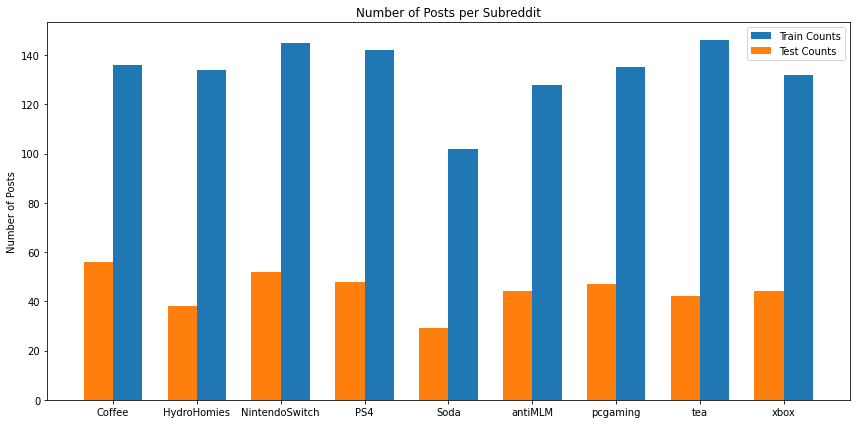

In [141]:

assessed_labels=['tea', 'HydroHomies', 'NintendoSwitch', 'PS4', 'pcgaming', 'Soda', 'Coffee', 'antiMLM', 'xbox']

x = np.arange(len(assessed_labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x + width/2, list(train_counts['Counts'].sort_index()), width, label='Train Counts')
bar2 = ax.bar(x - width/2, list(test_counts['Counts'].sort_index()), width, label='Test Counts')
ax.set_ylabel('Number of Posts')
ax.set_title('Number of Posts per Subreddit')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(sorted(assessed_labels))
fig.tight_layout()
plt.show()

## Q1b:

In [142]:
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

In [144]:
#Creating variables of the subreddit labels
train_labels = train_data['subreddit']
validation_labels = validation_data['subreddit']
test_labels = test_data['subreddit']
assessed_labels = list(set(train_labels.to_list()))
method_scores={}
print(assessed_labels)

['Soda', 'PS4', 'HydroHomies', 'NintendoSwitch', 'xbox', 'antiMLM', 'pcgaming', 'tea', 'Coffee']


In [145]:


def text_pipeline(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens

def evaluation_summary(description, true_labels, predictions, target_classes):
  print("Evaluation for: " + description)
  print("Accuracy score = ",round(accuracy_score(true_labels, predictions),3))
  print("Macro score = ",round(precision_score(true_labels, predictions, zero_division=0, average='macro'),3))
  print("Weighted score = ",round(precision_score(true_labels, predictions, zero_division=0, average='weighted'),3))
  print("Recall score = ",round(recall_score(true_labels, predictions, average='weighted'),3))
  print("F1 score = ",round(f1_score(true_labels, predictions, zero_division=0, average='weighted'),3))
  print()
  cm=confusion_matrix(true_labels, predictions, labels=assessed_labels)
  df_cm = pd.DataFrame(cm, index = [i for i in assessed_labels], columns= [i for i in assessed_labels])
  plt.clf()
  plt.figure(figsize=(10,7))
  sn.heatmap(df_cm, annot=True)

  return classification_report(true_labels, predictions,  digits=3, zero_division=0, target_names=target_classes, output_dict=True)

def get_scores(name, true_labels, predictions):
  accuracy=round(accuracy_score(true_labels, predictions),3)
  macro=round(precision_score(true_labels, predictions, zero_division=0, average='macro'),3)
  weighted=round(precision_score(true_labels, predictions, zero_division=0, average='weighted'),3)
  recall=round(recall_score(true_labels, predictions, average='weighted'),3)
  f1score=round(f1_score(true_labels, predictions, zero_division=0, average='weighted'),3)
  return [name, accuracy, macro, weighted, recall, f1score]
  
def get_f1scores(scores):
  f1_scores={}
  i=0        
  for key in lr_tfidf_score.keys():
    f1_scores[key]=lr_tfidf_score[key]['f1-score']
    i+=1
    if i==9:
      break
  return f1_scores


In [146]:
from sklearn.feature_extraction.text import CountVectorizer

# Create one-hot encoded vector using spacy pipeline
one_hot_vectorizer = CountVectorizer(tokenizer=text_pipeline, binary=True)

train_features = one_hot_vectorizer.fit_transform(train_data['body'].tolist())
validation_features = one_hot_vectorizer.transform(validation_data['body'])
test_features = one_hot_vectorizer.transform(test_data['body'])

#### **DummyClassifier - Strategy="most_frequent"**

Evaluation for: DummyClassifier - Most Frequent
Accuracy score =  0.105
Macro score =  0.012
Weighted score =  0.011
Recall score =  0.105
F1 score =  0.02



<Figure size 432x288 with 0 Axes>

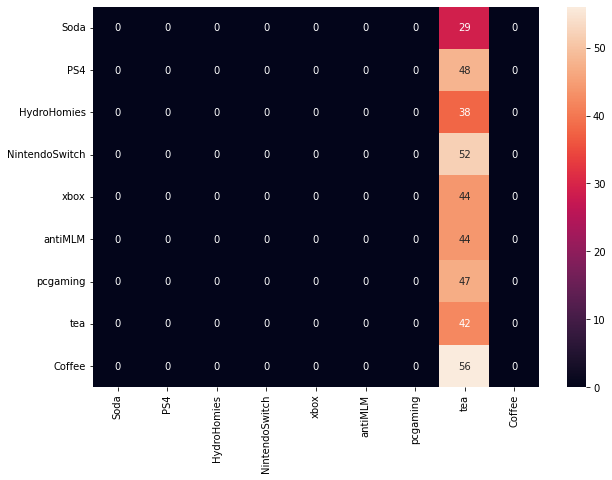

In [147]:
from sklearn.dummy import DummyClassifier

#Dummy Classifier - Most Frequent
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(train_features, train_labels)


dummy_mf_predicted_labels = dummy_mf.predict(test_features)
dummy_mf_score=evaluation_summary("DummyClassifier - Most Frequent", test_labels, dummy_mf_predicted_labels, assessed_labels)

#### **DummyClassifier - Strategy="stratified"**

Evaluation for: DummyClassifier - Stratified
Accuracy score =  0.135
Macro score =  0.134
Weighted score =  0.138
Recall score =  0.135
F1 score =  0.136



<Figure size 432x288 with 0 Axes>

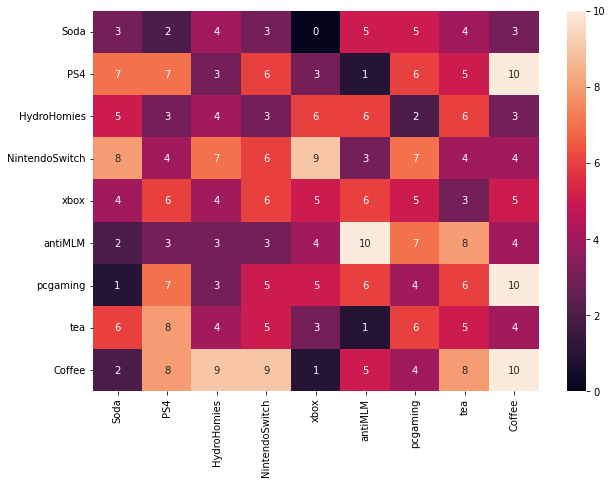

In [148]:
#Dummy Classifier - Stratified
dummy_str = DummyClassifier(strategy='stratified')
dummy_str.fit(train_features, train_labels)

dummy_str_predicted_labels = dummy_str.predict(test_features)
dummy_str_score=evaluation_summary("DummyClassifier - Stratified", test_labels, dummy_str_predicted_labels, assessed_labels)

### **LogisticRegression - One-Hot Vectorization**


Evaluation for: LR Model - One-Hot
Accuracy score =  0.758
Macro score =  0.767
Weighted score =  0.77
Recall score =  0.758
F1 score =  0.759



<Figure size 432x288 with 0 Axes>

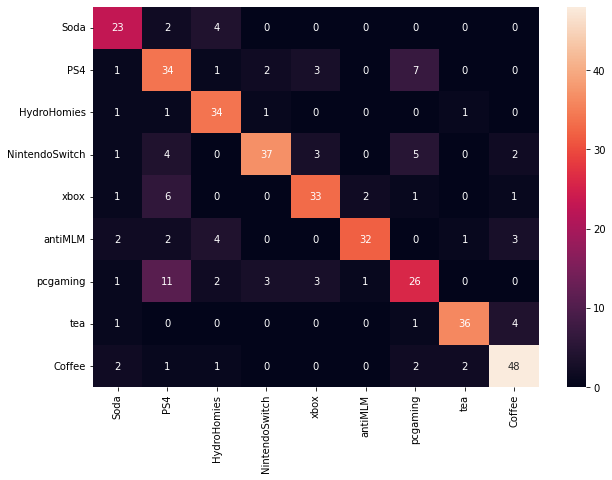

In [149]:
lr = LogisticRegression()
lr_model = lr.fit(train_features, train_labels)

lr_predicted_labels = lr_model.predict(test_features)
lr_oh_score=evaluation_summary("LR Model - One-Hot", test_labels, lr_predicted_labels, assessed_labels)

### **LogisticRegression - TF-IDF Vectorization**



In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=text_pipeline)

tfidf_train_features = tfidf_vectorizer.fit_transform(train_data['body'].tolist())
tfidf_validation_features = tfidf_vectorizer.transform(validation_data['body'])
tfidf_test_features = tfidf_vectorizer.transform(test_data['body'])

Evaluation for: LR Model - TF-IDF
Accuracy score =  0.798
Macro score =  0.81
Weighted score =  0.804
Recall score =  0.798
F1 score =  0.799




<Figure size 432x288 with 0 Axes>

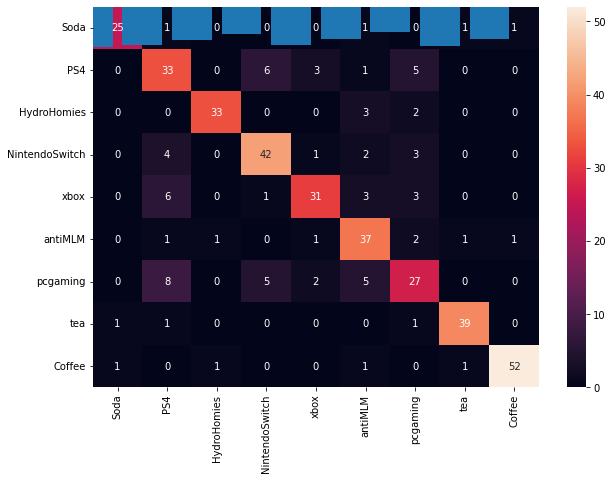

In [151]:
lr = LogisticRegression()
combined_model = lr.fit(tfidf_train_features,train_labels)

lr_tfidf_score=evaluation_summary("LR Model - TF-IDF", test_labels, lr.predict(tfidf_test_features), assessed_labels)

lr_tfidf_f1=get_f1scores(lr_tfidf_score)
print()
plt.xticks(rotation=90)
plt.bar(lr_tfidf_f1.keys(),lr_tfidf_f1.values())
q2scores_untuned=get_scores("Untuned",test_labels, lr.predict(tfidf_test_features))

In [179]:
f1_scores={}
for label in lr_tfidf_score.keys():
    if len(f1_scores)==9:
      break
    f1_scores[label]=lr_tfidf_score[label]['f1-score']

In [180]:
print(f1_scores)

{'Soda': 0.9549549549549549, 'PS4': 0.8918918918918918, 'HydroHomies': 0.8288288288288288, 'NintendoSwitch': 0.6603773584905661, 'xbox': 0.912280701754386, 'antiMLM': 0.8043478260869567, 'pcgaming': 0.6046511627906976, 'tea': 0.9285714285714286, 'Coffee': 0.759493670886076}


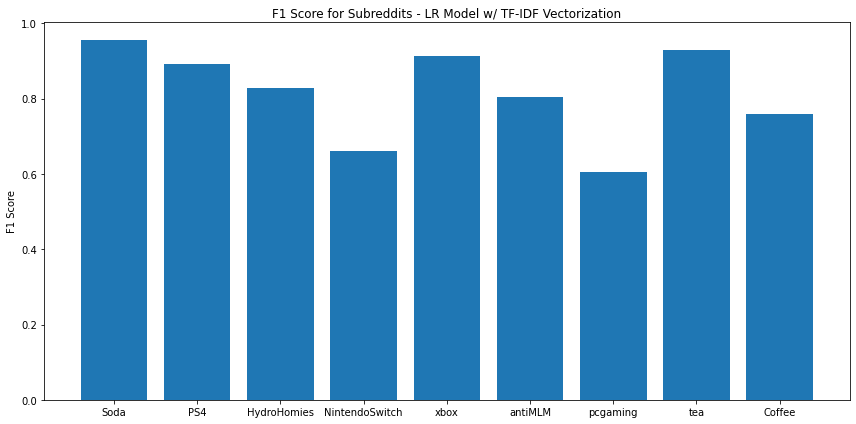

In [181]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(f1_scores.keys(), f1_scores.values())
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score for Subreddits - LR Model w/ TF-IDF Vectorization')
ax.set_xticks(x)
ax.set_xticklabels(assessed_labels)
fig.tight_layout()
plt.show()

### **SVC Classifier - One-Hot Vectorization**

Evaluation for: SVC Classifier - One-Hot
Accuracy score =  0.69
Macro score =  0.755
Weighted score =  0.751
Recall score =  0.69
F1 score =  0.696



<Figure size 432x288 with 0 Axes>

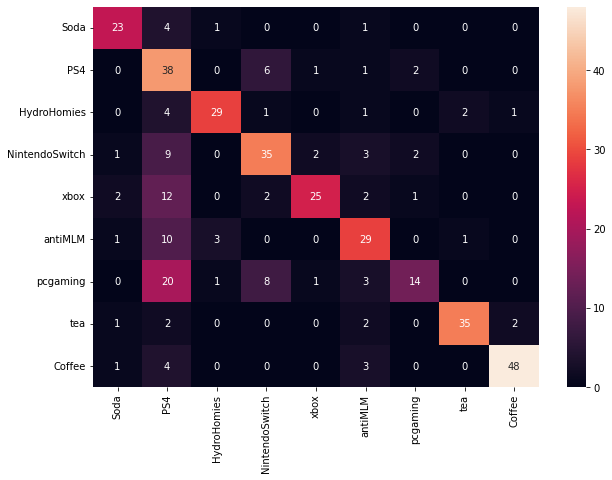

In [154]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf',random_state=100)
svc.fit(train_features,train_labels)
svc_oh_pred=svc.predict(test_features)
svc_score=evaluation_summary("SVC Classifier - One-Hot", test_labels, svc_oh_pred, assessed_labels)     

## Q1c:

### **SVC Classifier - TF-IDF Vectorization**

In [155]:
def altered_text_pipeline(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            if nltk.pos_tag([t.lemma_.lower()])[0][1] in ["NN","NNP","VB","JJR"]:
              tokens.append(t.lemma_.lower())
    return tokens



In [156]:
nltk.download('averaged_perceptron_tagger')

fidf_vectorizer = TfidfVectorizer(tokenizer=altered_text_pipeline)

tfidf_train_features = tfidf_vectorizer.fit_transform(train_data['body'].tolist())
tfidf_validation_features = tfidf_vectorizer.transform(validation_data['body'])
tfidf_test_features = tfidf_vectorizer.transform(test_data['body'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Evaluation for: SVC Classifier - TF-IDF
Accuracy score =  0.792
Macro score =  0.822
Weighted score =  0.815
Recall score =  0.792
F1 score =  0.799



<Figure size 432x288 with 0 Axes>

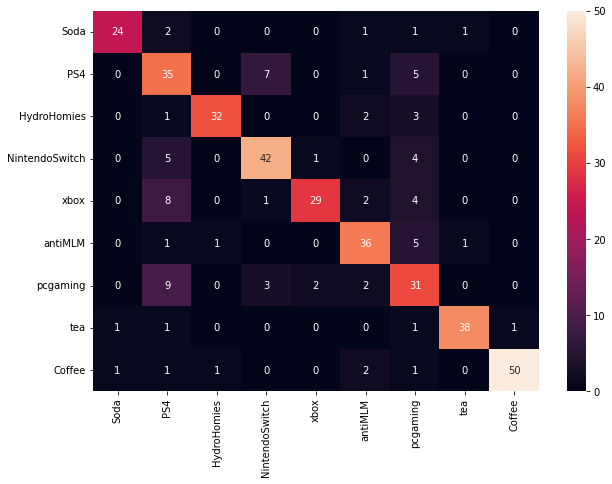

In [157]:
from sklearn.svm import SVC

tfidf_svc=SVC(random_state=100)
tfidf_svc.fit(tfidf_train_features,train_labels)
svc_tfidf_pred=tfidf_svc.predict(tfidf_test_features)
tf_idf_svc_score=evaluation_summary("SVC Classifier - TF-IDF", test_labels, svc_tfidf_pred, assessed_labels)

In [158]:
svc_tfidf_indices = [i for i in range(len(test_labels)) if test_labels[i] != svc_tfidf_pred[i]]
svc_indices = [i for i in range(len(test_labels)) if test_labels[i] != svc_oh_pred[i]]

In [159]:
svc_tfidf_wrong = test_data.iloc[svc_tfidf_indices,:]
svc_wrong = test_data.iloc[svc_indices,:]
svc_tfidf=[]
svc_oh=[]
for label in assessed_labels:
  svc_tfidf.append(len(svc_tfidf_wrong[svc_tfidf_wrong['subreddit']==label]))
  svc_oh.append(len(svc_wrong[svc_wrong['subreddit']==label]))

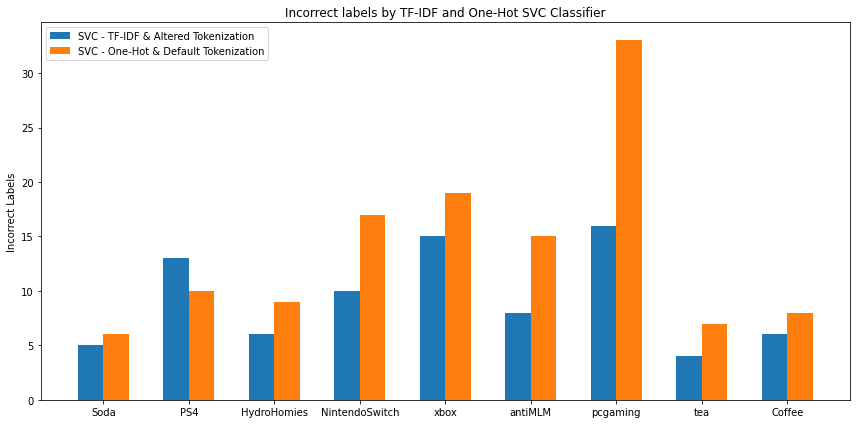

In [160]:
x = np.arange(len(assessed_labels)) 
width = 0.3 

fig, ax = plt.subplots(figsize=(12,6))
x1 = ax.bar(x - width/2, svc_tfidf, width, label='SVC - TF-IDF & Altered Tokenization')
x2 = ax.bar(x + width/2, svc_oh, width, label='SVC - One-Hot & Default Tokenization')
ax.set_ylabel('Incorrect Labels')
ax.set_title('Incorrect labels by TF-IDF and One-Hot SVC Classifier')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(assessed_labels)
fig.tight_layout()
plt.show()

# Q2:

## Q2a:

### **Parameter Tuning**



In [161]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=text_pipeline, sublinear_tf=True, max_features=2670, ngram_range=(1,3))

tfidf_train_features = tfidf_vectorizer.fit_transform(train_data['body'].tolist())
tfidf_validation_features = tfidf_vectorizer.transform(validation_data['body'])
tfidf_test_features = tfidf_vectorizer.transform(test_data['body'])

Evaluation for: LR Model - TF-IDF
Accuracy score =  0.812
Macro score =  0.824
Weighted score =  0.818
Recall score =  0.812
F1 score =  0.812



<Figure size 432x288 with 0 Axes>

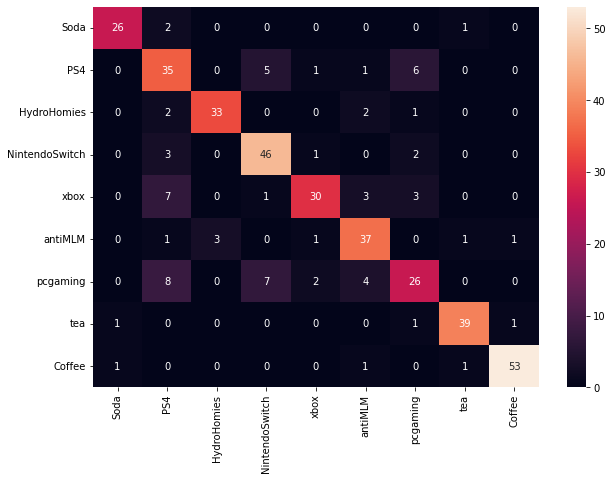

In [162]:
lr = LogisticRegression(C=1.08)
lr = lr.fit(tfidf_train_features,train_labels)

lr_tfidf_score=evaluation_summary("LR Model - TF-IDF", test_labels, lr.predict(tfidf_test_features), assessed_labels)

q2scores_tuned=get_scores("Tuned",test_labels, lr.predict(tfidf_test_features))

From the tuning of the parameters on the validation set, scores marginally increased across the test set from the untuned model. I suspect these changes were not larger as parameters were tuned with the validation set as the target, rather than the test data. With the sensitivity of certain parameters, even minor changes in the data set can have effect on the performance of the model. 

In [163]:
scores_df=pd.DataFrame(np.array([q2scores_tuned,q2scores_untuned]),columns=[' ','Accuracy','Macro','Weighted','Recall','F1'])
print("Tuned v Untuned TF-IDF LogisticRegression Models on Test Set")
scores_df

Tuned v Untuned TF-IDF LogisticRegression Models on Test Set


,,Accuracy,Macro,Weighted,Recall,F1
0,Tuned,0.812,0.824,0.818,0.812,0.812
1,Untuned,0.798,0.81,0.804,0.798,0.799


## Q2b:

### **Error Analysis**

In [164]:
wrong_indices = [i for i in range(len(test_labels)) if test_labels[i] != lr.predict(tfidf_test_features)[i]]

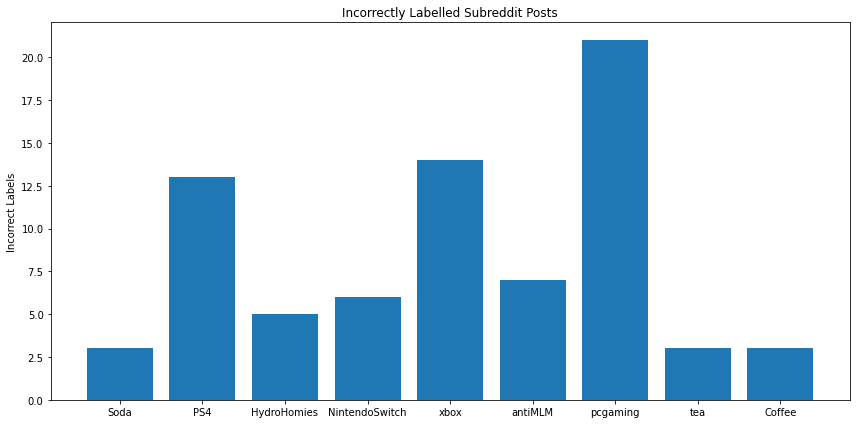

In [165]:
wrong_posts = test_data.iloc[wrong_indices,:]

wrong_subs=[]
for label in assessed_labels:
  wrong_subs.append(len(wrong_posts[wrong_posts['subreddit']==label]))

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(assessed_labels, wrong_subs)
ax.set_ylabel('Incorrect Labels')
ax.set_title('Incorrectly Labelled Subreddit Posts')
ax.set_xticks(x)
ax.set_xticklabels(assessed_labels)
fig.tight_layout()
plt.show()

In [166]:
print("Incorrectly Labelled r/pcgaming Posts\n")
for post in wrong_posts[wrong_posts['subreddit']=='pcgaming']['title']:
  print(post)
print()
print("Incorrectly Labelled r/antiMLM Posts\n")
for post in wrong_posts[wrong_posts['subreddit']=='antiMLM']['title']:
  print(post)

Incorrectly Labelled r/pcgaming Posts

Fanatical Sci-fi Mystery Bundle (Steam Keys) (already owned so I'm giving them away to whoever wants them)
FYI, Today is the last day to purchase Final Fantasy V and VI before they're replaced with the Pixel Remaster
How can I get better at positioning and awareness in games like Battlefield>
Heads up. GMGs 20% off coupon works on sale items.
PC gamers with a Switch, do you see yourself buying games on the Switch you'd otherwise buy on PC, for the portability?
Activision and Crash 4: I'm tired of begging for a game to be on my platform of choice. I'm tired of uncertainties and lack of communication.
Halo infinite is the best multi-player I've played
I am partially disabled and cannot use a mouse & keyboard. Are there any PvP FPS which are controller only? Splitfish left hand controller was partially helping here. Sadly mine broke after a few hours use & the company ignored all my mails & social media messages, even though I could see...
What contr

# **Q3:**

## **Q3a:**

## **Q3b:**

In [167]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [168]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf-idf', TfidfVectorizer(tokenizer=text_pipeline, sublinear_tf=True, max_features=2670, ngram_range=(1,3))), 
              ])),
            ('summary', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tf-idf', TfidfVectorizer(tokenizer=text_pipeline, sublinear_tf=True, max_features=2670, ngram_range=(1,3))), 
              ])),
        ])
        )
    ])

In [169]:
pipeline_train_features = prediction_pipeline.fit_transform(train_data)
pipeline_validation_features = prediction_pipeline.transform(validation_data)
pipeline_test_features = prediction_pipeline.transform(test_data)

Evaluation for: Voting Classifier w/ Pipeline
Accuracy score =  0.835
Macro score =  0.844
Weighted score =  0.842
Recall score =  0.835
F1 score =  0.835



<Figure size 432x288 with 0 Axes>

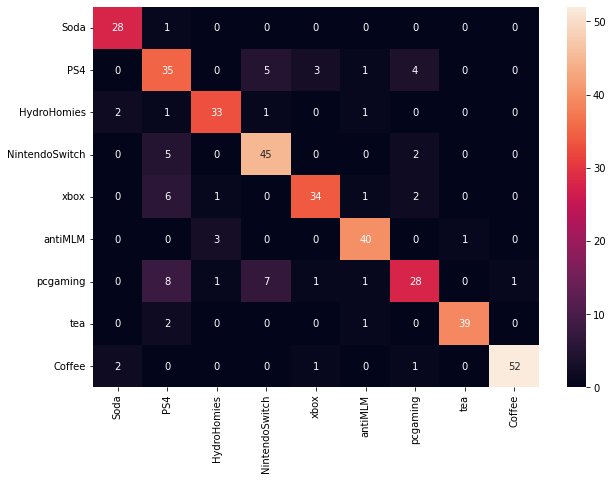

In [170]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
 
lr1 = LogisticRegression(C=1.08)
sdg2 = SGDClassifier()
svc3 = SVC()

estimators=[('LR',lr1),('SDG',sdg2),('SVC',svc3)]

vc = VotingClassifier(estimators=estimators)
vc = vc.fit(pipeline_train_features,train_labels)

vc_score=evaluation_summary("Voting Classifier w/ Pipeline", test_labels, vc.predict(pipeline_test_features), assessed_labels)

## **Q3c:**

In [171]:
q3scores=get_scores("Engineered",test_labels, vc.predict(pipeline_test_features))
scores_df=pd.DataFrame(np.array([q2scores_tuned,q3scores]),columns=[' ','Accuracy','Macro','Weighted','Recall','F1'])
print("Tuned v Untuned TF-IDF LogisticRegression Models on Test Set")
scores_df

Tuned v Untuned TF-IDF LogisticRegression Models on Test Set


,,Accuracy,Macro,Weighted,Recall,F1
0,Tuned,0.812,0.824,0.818,0.812,0.812
1,Engineered,0.835,0.844,0.842,0.835,0.835


Improvement from engineered model


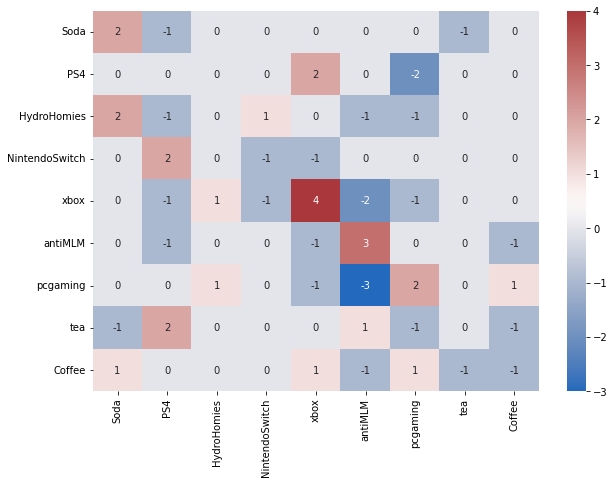

In [172]:
  cm1=confusion_matrix(test_labels, vc.predict(pipeline_test_features), labels=assessed_labels)
  cm2=confusion_matrix(test_labels, lr.predict(tfidf_test_features), labels=assessed_labels)
  cm3=cm1-cm2
  df_cm = pd.DataFrame(cm3, index = [i for i in assessed_labels], columns= [i for i in assessed_labels])
  print("Improvement from engineered model")
  plt.figure(figsize=(10,7))
  sn.heatmap(df_cm, annot=True, cmap='vlag')

In [173]:
vc_f1=[]
tuned_f1=[]
for label in vc_score.keys():
    if len(vc_f1)==9:
      break
    vc_f1.append(vc_score[label]['f1-score'])

for label in lr_tfidf_score.keys():
    if len(tuned_f1)==9:
      break
    tuned_f1.append(lr_tfidf_score[label]['f1-score'])

print(vc_f1)

[0.9541284403669724, 0.868421052631579, 0.8181818181818181, 0.6603773584905661, 0.9180327868852458, 0.8988764044943819, 0.6666666666666666, 0.951219512195122, 0.8192771084337349]


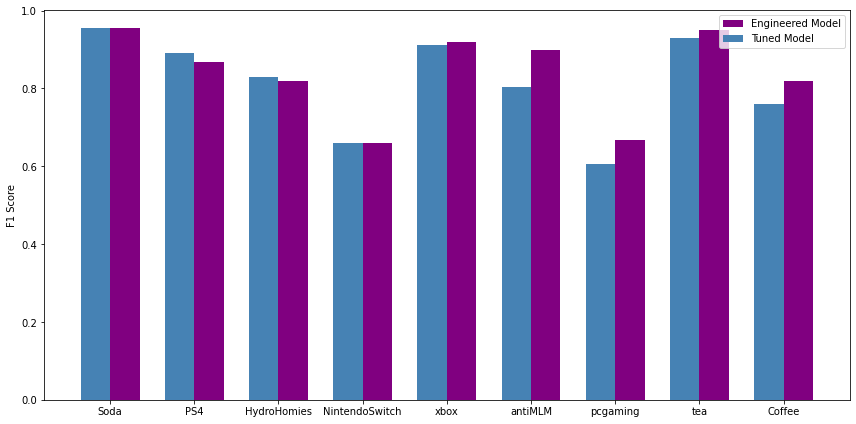

In [174]:
x = np.arange(len(assessed_labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x + width/2, vc_f1, width, label='Engineered Model', color='purple')
bar2 = ax.bar(x - width/2, tuned_f1, width, label='Tuned Model', color='steelblue')
ax.set_ylabel('F1 Score')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(assessed_labels)
fig.tight_layout()
plt.show()

In [175]:
vc_pred=vc.predict(pipeline_test_features)
lr_pred=lr.predict(tfidf_test_features)

svc_tfidf_indices = [i for i in range(len(test_labels)) if test_labels[i] != vc_pred[i]]
svc_indices = [i for i in range(len(test_labels)) if test_labels[i] != lr_pred[i]]

In [176]:
svc_tfidf_wrong = test_data.iloc[svc_tfidf_indices,:]
svc_wrong = test_data.iloc[svc_indices,:]
svc_tfidf=[]
svc_oh=[]
for label in assessed_labels:
  svc_tfidf.append(len(svc_tfidf_wrong[svc_tfidf_wrong['subreddit']==label]))
  svc_oh.append(len(svc_wrong[svc_wrong['subreddit']==label]))

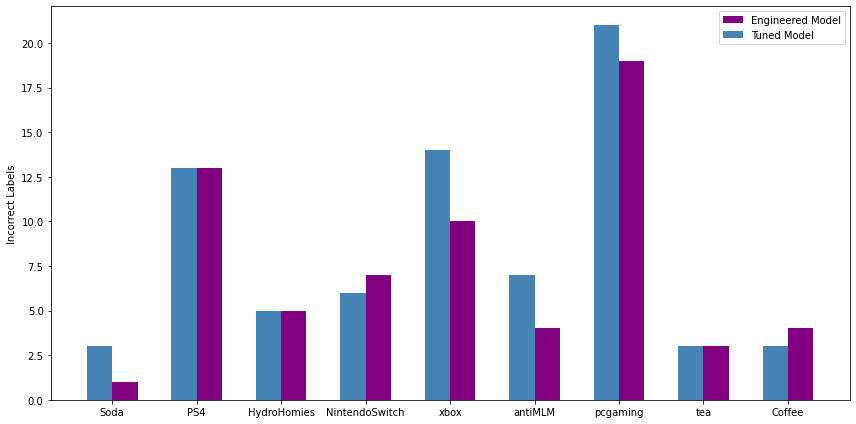

In [177]:
x = np.arange(len(assessed_labels)) 
width = 0.3 

fig, ax = plt.subplots(figsize=(12,6))
x1 = ax.bar(x + width/2, svc_tfidf, width, label='Engineered Model', color='purple')
x2 = ax.bar(x - width/2, svc_oh, width, label='Tuned Model', color='steelblue')
ax.set_ylabel('Incorrect Labels')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(assessed_labels)
fig.tight_layout()
plt.show()